# TD 3 - La régression logistique - algo. de descente du gradient

## Packages utiles

In [1]:
from sklearn import datasets # donnees
import os # rep de travail
import pandas as pd # data analysis
from scipy import stats # stat desc
import matplotlib.pyplot as plt # graphiques
import numpy as np # maths
import sklearn.preprocessing # standardisation des donnees
from collections import Counter # freq table

from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.model_selection import train_test_split # train and test samples
from sklearn.metrics import confusion_matrix # confusion matrix
from scipy import optimize # algos d'optim

## Les données

In [2]:
#-- Import des données
breast_cancer = datasets.load_breast_cancer()
print(breast_cancer.DESCR)
#Data Set Characteristics:
#    :Number of Instances: 569
#
#    :Number of Attributes: 30 numeric, predictive attributes and the class
#
#    :Attribute Information:
#        - radius (mean of distances from center to points on the perimeter)
#        - texture (standard deviation of gray-scale values)
#        - perimeter
#        - area
#        - smoothness (local variation in radius lengths)
#        - compactness (perimeter^2 / area - 1.0)
#        - concavity (severity of concave portions of the contour)
#        - concave points (number of concave portions of the contour)
#        - symmetry
#        - fractal dimension ("coastline approximation" - 1)
#
#        The mean, standard error, and "worst" or largest (mean of the three
#        largest values) of these features were computed for each image,
#        resulting in 30 features.  For instance, field 3 is Mean Radius, field
#        13 is Radius SE, field 23 is Worst Radius.
#
#        - class:
#                - WDBC-Malignant
#                - WDBC-Benign


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [11]:
#-- Stat. descriptives
dat=breast_cancer.data
Y=breast_cancer.target
names = breast_cancer.feature_names
#%% Stat descriptives
df=pd.DataFrame(X)
df.columns=names # pour ajouter les noms de colonnes
Counter(Y) # nb of cases / controls
df.groupby(Y).mean()
print(dat.shape)


(569, 30)


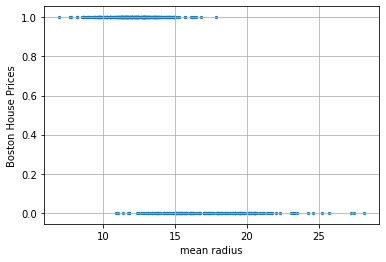

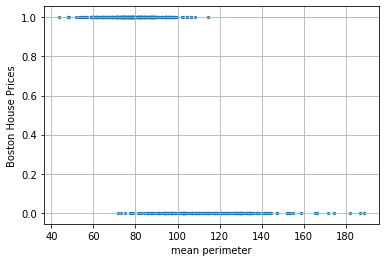

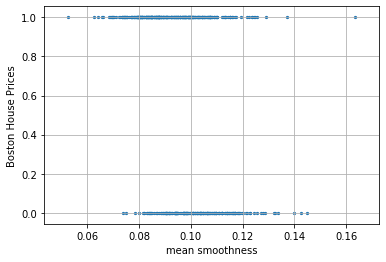

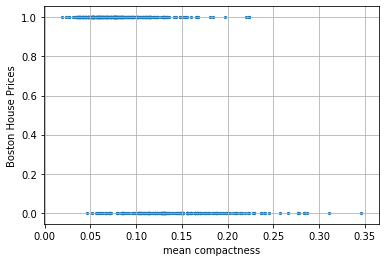

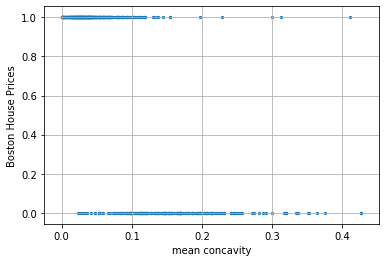

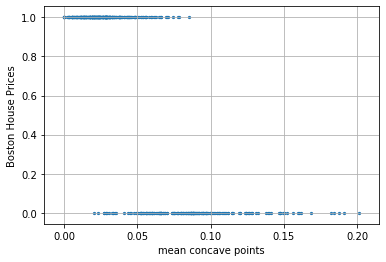

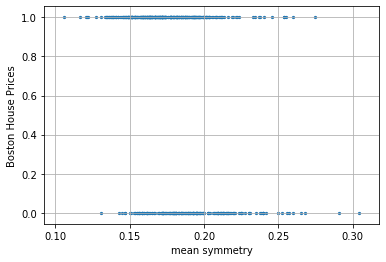

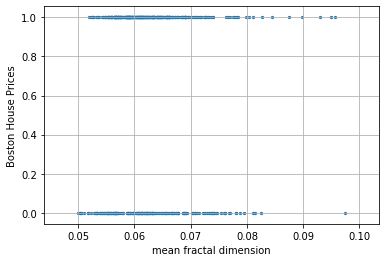

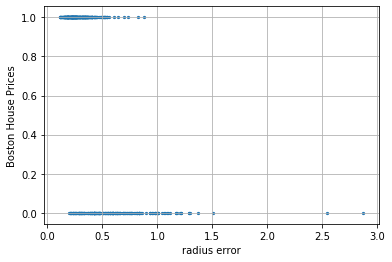

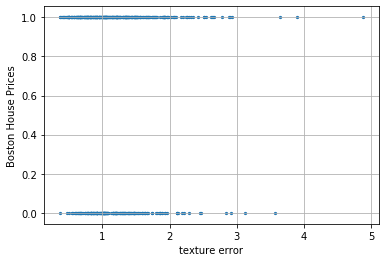

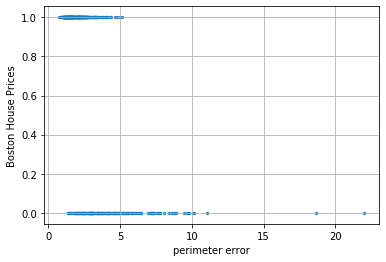

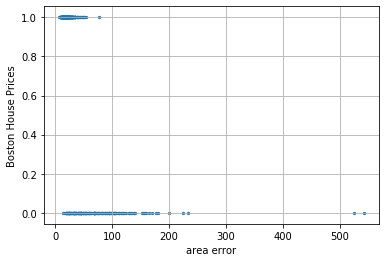

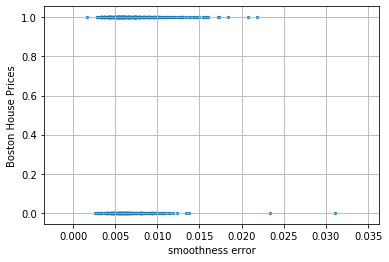

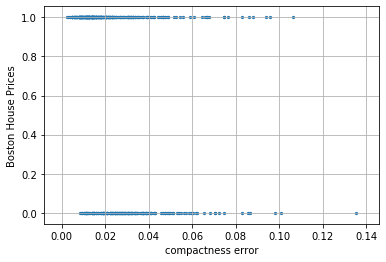

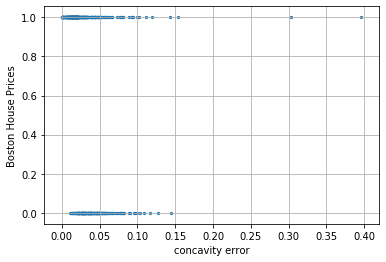

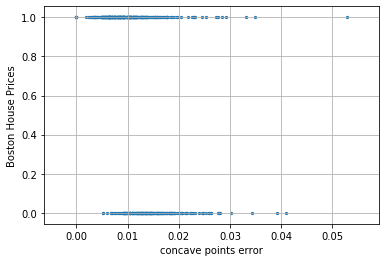

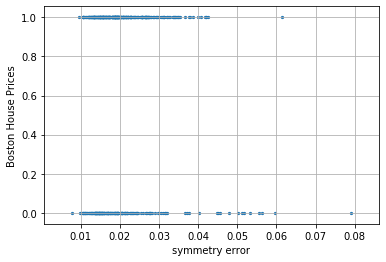

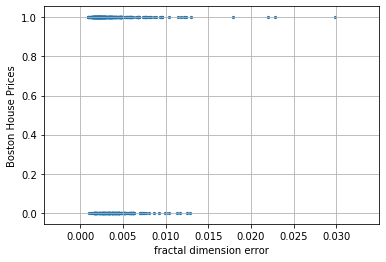

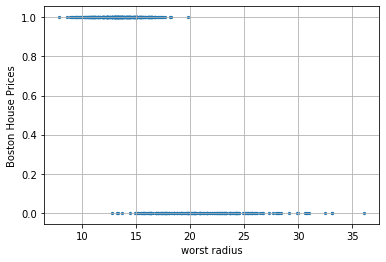

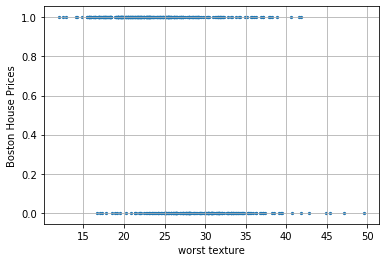

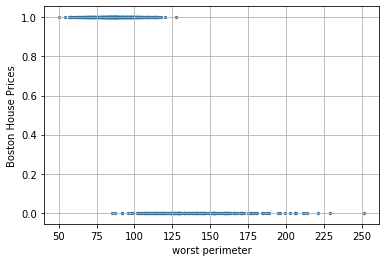

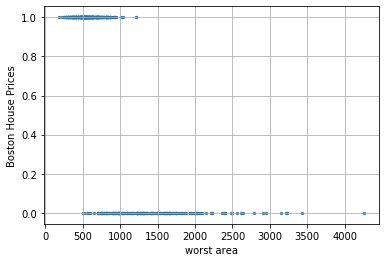

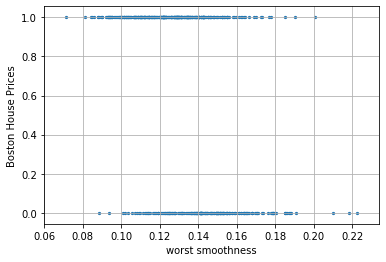

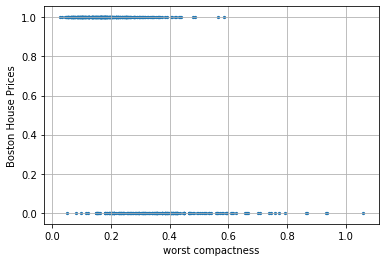

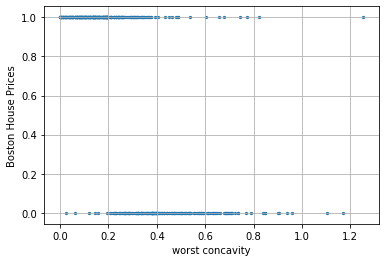

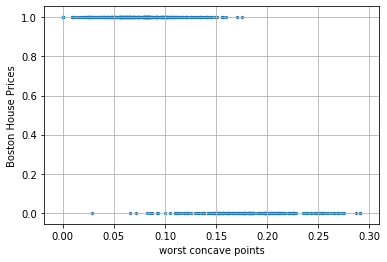

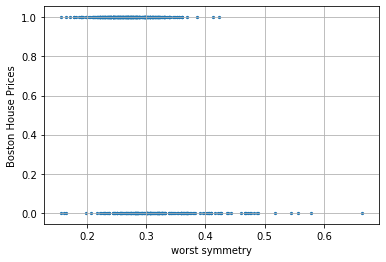

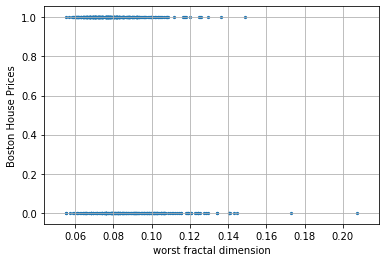

In [4]:
#-- Plots
m,d = X.shape
for k in range(d):
    plt.figure()
    plt.scatter(X[:,k],Y,s=5)
    plt.xlabel(names[k])
    plt.ylabel("Breast Cancer")
    plt.grid()
    plt.show()

## Algo de descente du gradient pour la régression logistique

code des fonctions et tests de ces fonctions dans le cas de la régression logistique simple et multiple


In [51]:
###### -- standardisation des X
def standardisation(X,i=0):
    return np.hstack((np.ones((X.shape[0],1)),(X - X.mean(axis=0)) / X.std(axis=0,ddof=0)))



X = standardisation(dat,i=2)

#-- Test 1 - reg simple
X1 = X[:,:2]
print(X1)
print(X1.shape)

#-- Test 2 - reg multiple
X2 = X[:,:3]
print(X2)
print(X2.shape)

[[ 1.          1.09706398]
 [ 1.          1.82982061]
 [ 1.          1.57988811]
 ...
 [ 1.          0.70228425]
 [ 1.          1.83834103]
 [ 1.         -1.80840125]]
(569, 2)
[[ 1.          1.09706398 -2.07333501]
 [ 1.          1.82982061 -0.35363241]
 [ 1.          1.57988811  0.45618695]
 ...
 [ 1.          0.70228425  2.0455738 ]
 [ 1.          1.83834103  2.33645719]
 [ 1.         -1.80840125  1.22179204]]
(569, 3)


In [61]:
#-- Modèle
# attention X : contient X^0 = [1,...,1] + les X^j
def f(X,betas):
    return np.divide(np.exp(np.dot(X,betas)), 1+ np.exp(np.dot(X,betas)))
    #return 1 / (1 - np.exp(- np.dot(X,betas)))

#-- Test 1 - reg simple
B1 = [0,1]
Yhat1 = f(X1,B1)
print(Yhat1)

#-- Test 2 - reg multiple
B2 = [1,2,3]
Yhat2 = f(X2,B2)
print(Yhat2)



[0.74970958 0.86174035 0.82918867 0.3167151  0.85199021 0.38310856
 0.76330904 0.47040544 0.42063508 0.38378001 0.6312437  0.61523998
 0.80724398 0.6199353  0.47182077 0.52927025 0.53916386 0.63848568
 0.83396181 0.45839661 0.42618202 0.21197182 0.58526534 0.88052267
 0.67183251 0.70175141 0.53209968 0.78128197 0.58250514 0.7266671
 0.78225107 0.34307443 0.69456955 0.81162476 0.63848568 0.67744315
 0.50871184 0.42271291 0.56095072 0.454169   0.45135421 0.28855838
 0.80278609 0.44012793 0.43244453 0.78321707 0.15649113 0.43244453
 0.35663936 0.45487316 0.33797208 0.46545568 0.3495036  0.76176622
 0.5686298  0.3228931  0.80900553 0.54128018 0.42409966 0.17297082
 0.24528359 0.17215975 0.50871184 0.19669357 0.39866004 0.54621234
 0.2101275  0.30999325 0.19031153 0.40548791 0.79687519 0.18421711
 0.7053057  0.47677784 0.37375606 0.63454307 0.45769158 0.75289359
 0.84800708 0.41097679 0.31856185 0.44433124 0.95892789 0.80413157
 0.35338772 0.77391494 0.52502262 0.80052815 0.37708582 0.53633

In [62]:
#-- Fonction-cout
# ordre des arguments : beta en 1er pour comparer avec la fonction d'optim
def cout(X,Y,betas):
    m,d = X.shape
    return (-1/m) *  (np.dot(Y,np.log(f(X,betas))) + np.dot(1-Y,np.log(1-f(X,betas))))
    #np.sum(Y * np.log(f(X,betas)) + (1 - Y) * np.log(1 - f(X,betas)))

#-- Test 1 - reg simple
Ycout1 = cout(X1,Y,B1)
print(Ycout1)

#-- Test 2 - reg multiple
Ycout2 = cout(X2,Y,B2)
print(Ycout2)


1.1571682291209924
2.992598893815891


In [94]:
#-- Gradient
# ordre des arguments : beta en 1er pour comparer avec la fonction d'optim
def grad(X,Y,betas,alpha=0):
    m,d = X.shape
    return 1/m * np.dot(f(X,betas)-Y,X) + np.dot(betas,alpha/m)

#-- Test 1 - reg simple
print(grad(X1,Y,B1))

#-- Test 2 - reg multiple
print(grad(X2,Y,B2))



[-0.13799088  0.55443406]
[-0.08361628  0.60834956  0.52531841]


In [95]:
#-- Algo de descente du gradient
def grad_descent(X,Y,betas,pas,g_alpha=0):
    new_beta =  - pas * grad(X,Y,betas)
    err = 1
    i=0
    tableau_cout = []
    tableau_betas = []
    while i<10000 and err > 0.001 or err < -0.001:
        new_beta = new_beta - pas * grad(X,Y,new_beta,alpha=g_alpha)
        err = abs(cout(X,Y,betas) - cout(X,Y,new_beta))
        betas = new_beta
        tableau_cout.append(cout(X,Y,betas))
        tableau_betas.append(betas)
        i+=1
    return new_beta, tableau_betas, tableau_cout


#-- Test 1  - reg simple
b,barray,coutarray = grad_descent(X1,Y,B1,0.01)
print(b)
print(barray)
print(coutarray)

#-- Test 2 - reg multiple
b,barray,coutarray = grad_descent(X2,Y,B2,0.001)
print(b)
print(barray)
print(coutarray)

[ 0.0820142  -0.22875462]
[array([ 0.00265062, -0.00906011]), array([ 0.00391816, -0.0125671 ]), array([ 0.00518253, -0.01606531]), array([ 0.00644374, -0.01955479]), array([ 0.0077018 , -0.02303554]), array([ 0.00895671, -0.02650759]), array([ 0.01020848, -0.02997097]), array([ 0.01145713, -0.03342569]), array([ 0.01270265, -0.03687179]), array([ 0.01394506, -0.04030927]), array([ 0.01518436, -0.04373818]), array([ 0.01642057, -0.04715852]), array([ 0.01765369, -0.05057033]), array([ 0.01888372, -0.05397362]), array([ 0.02011068, -0.05736843]), array([ 0.02133458, -0.06075476]), array([ 0.02255542, -0.06413266]), array([ 0.0237732 , -0.06750214]), array([ 0.02498794, -0.07086322]), array([ 0.02619965, -0.07421593]), array([ 0.02740833, -0.0775603 ]), array([ 0.02861399, -0.08089634]), array([ 0.02981664, -0.08422409]), array([ 0.03101628, -0.08754356]), array([ 0.03221293, -0.09085478]), array([ 0.03340659, -0.09415777]), array([ 0.03459727, -0.09745256]), array([ 0.03578498, -0.10073

## Test avec plusieurs initialisations 
visualisation de la fonction cout et des valeurs des paramètres au cours des itérations

[ 0.08257664 -0.23002494]


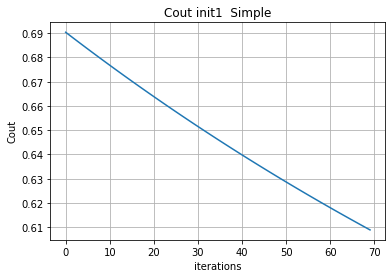

[ 0.08192663 -0.2274718 ]


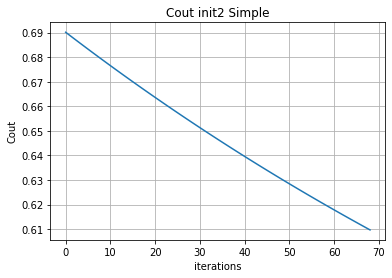

[ 0.08030415 -0.22835952]


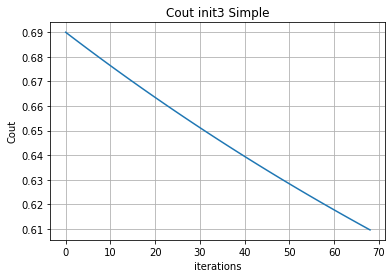

[ 0.11163615 -0.30468171 -0.16665293]


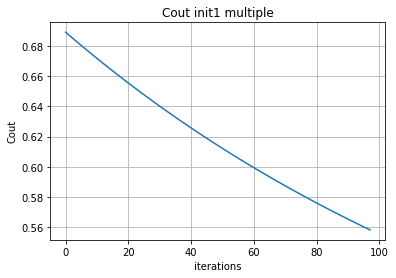

D:\Program\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
[ 0.11096777 -0.30606965 -0.16748692]


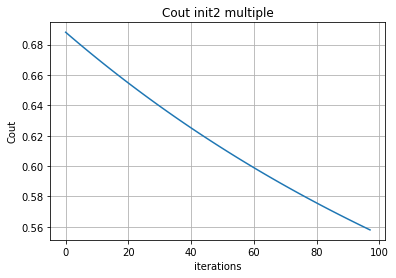

[ 0.11072681 -0.30559351 -0.16658224]


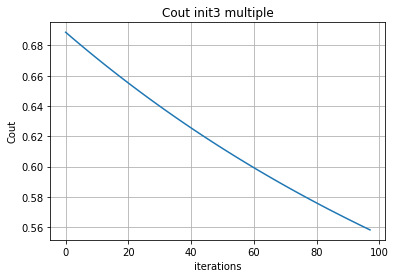

In [110]:
#-- Test 1  - reg simple
# init 1
b1, b, c = grad_descent(X1,Y,[0.2,0],0.01)
print(b1)
plt.figure()
plt.grid()
plt.title("Cout init1  Simple")
plt.xlabel("iterations")
plt.ylabel("Cout")
plt.plot(c)
plt.show()
# init 2
b1, b, c = grad_descent(X1,Y,[0,0.2],0.01)
print(b1)
plt.figure()
plt.grid()
plt.title("Cout init2 Simple")
plt.xlabel("iterations")
plt.ylabel("Cout")
plt.plot(c)
plt.show()
# init 3
b1, b, c = grad_descent(X1,Y,[1,1],0.01)
print(b1)
plt.figure()
plt.grid()
plt.title("Cout init3 Simple")
plt.xlabel("iterations")
plt.ylabel("Cout")
plt.plot(c)
plt.show()

#-- Test 2 - reg multiple
# init 1
b1, b, c = grad_descent(X2,Y,[0.2,0,1],0.01)
print(b1)
plt.figure()
plt.grid()
plt.title("Cout init1 multiple")
plt.xlabel("iterations")
plt.ylabel("Cout")
plt.plot(c)
plt.show()
# init 2
b1, b, c = grad_descent(X2,Y,[5,6,7],0.01)
print(b1)
plt.figure()
plt.grid()
plt.title("Cout init2 multiple")
plt.xlabel("iterations")
plt.ylabel("Cout")
plt.plot(c)
plt.show()
# init 3
b1, b, c = grad_descent(X2,Y,[1,1,1],0.01)
print(b1)
plt.figure()
plt.grid()
plt.title("Cout init3 multiple")
plt.xlabel("iterations")
plt.ylabel("Cout")
plt.plot(c)
plt.show()

COMMENTAIRES: 
Toutes mes fonctions de cout se ressemble peut importe les paramètres d'entrés et je ne vois pas de courbe chutant fortement au debut et se stabilisant vers les 0.

## Test avec plusieurs pas de descente
visualisation de la fonction cout et des valeurs des paramètres au cours des itérations

[ 0.46610944 -1.42901906]


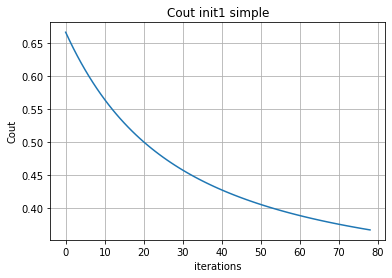

[ 0.08257664 -0.23002494]


[ 0.00033234 -0.00105863]


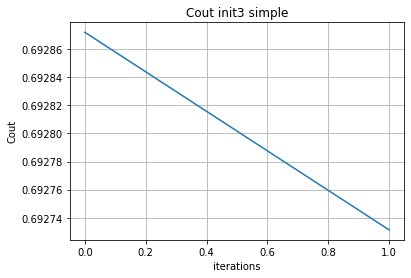

[ 0.6605143  -2.39844209 -0.77551975]


[ 0.11072681 -0.30559351 -0.16658224]


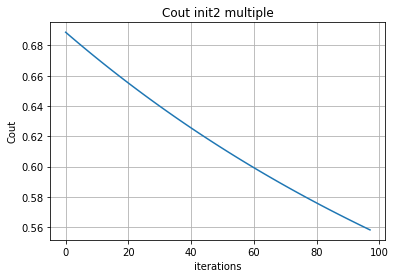

[ 0.68089754 -2.70318177 -0.81326   ]


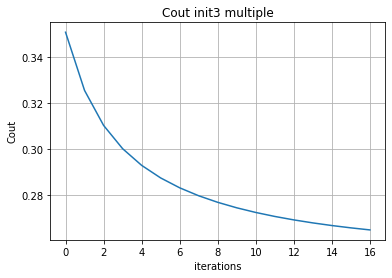

In [117]:
#-- Test 1  - reg simple

# alpha 1
b1, b, c = grad_descent(X1,Y,[0.2,0],0.1,g_alpha=0.1)
print(b1)
plt.figure()
plt.grid()
plt.title("Cout init1 simple")
plt.xlabel("iterations")
plt.ylabel("Cout")
plt.plot(c)
plt.show()
# alpha 2
b1, b, c = grad_descent(X1,Y,[0.2,0],0.01)
print(b1)
plt.figure()
plt.grid()
plt.title("Cout init2 simple")
plt.xlabel("iterations")
plt.ylabel("Cout")
plt.plot(c)
plt.show()
# alpha 3
b1, b, c = grad_descent(X1,Y,[0.2,0],0.001)
print(b1)
plt.figure()
plt.grid()
plt.title("Cout init3 simple")
plt.xlabel("iterations")
plt.ylabel("Cout")
plt.plot(c)
plt.show()

#-- Test 2 - reg multiple
# alpha 1
b1, b, c = grad_descent(X2,Y,[1,1,1],1)
print(b1)
plt.figure()
plt.grid()
plt.title("Cout init1 multiple")
plt.xlabel("iterations")
plt.ylabel("Cout")
plt.plot(c)
plt.show()
# alpha 2
b1, b, c = grad_descent(X2,Y,[1,1,1],0.01)
print(b1)
plt.figure()
plt.grid()
plt.title("Cout init2 multiple")
plt.xlabel("iterations")
plt.ylabel("Cout")
plt.plot(c)
plt.show()
# alpha 3
b1, b, c = grad_descent(X2,Y,[1,1,1],2)
print(b1)
plt.figure()
plt.grid()
plt.title("Cout init3 multiple")
plt.xlabel("iterations")
plt.ylabel("Cout")
plt.plot(c)
plt.show()

COMMENTAIRES: Si je met des pas immense alors ma courbe de cout prend une apparence plus logique

[ 0.44953402 -1.36926932]


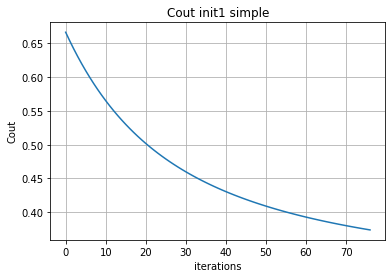

[ 0.08020005 -0.2234277 ]


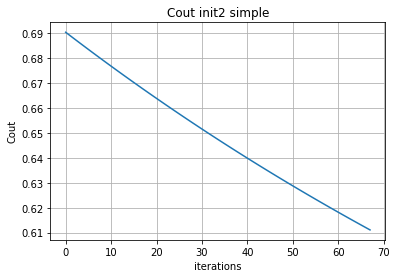

[ 0.00033234 -0.00105862]


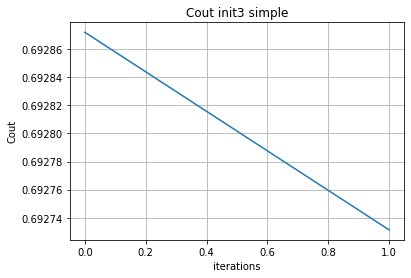

[ 0.61177839 -2.12437386 -0.71075185]


[ 0.10928197 -0.30168477 -0.1645437 ]


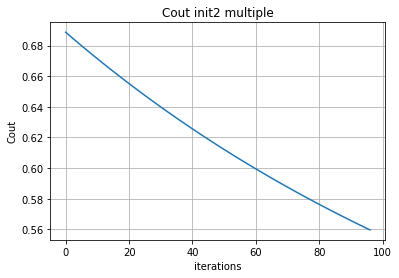

[ 0.62388278 -2.30705233 -0.72911738]


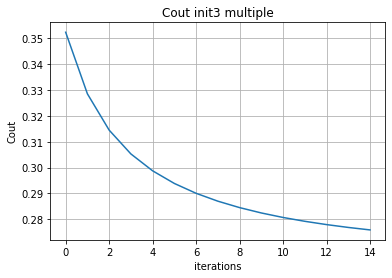

In [116]:
#-- Pour comparer
# avec les algos d'optim

#-- Test 1  - reg simple
# alpha 1
b1, b, c = grad_descent(X1,Y,[0.2,0],0.1,g_alpha=5)
print(b1)
plt.figure()
plt.grid()
plt.title("Cout init1 simple")
plt.xlabel("iterations")
plt.ylabel("Cout")
plt.plot(c)
plt.show()
# alpha 2
b1, b, c = grad_descent(X1,Y,[0.2,0],0.01,g_alpha=5)
print(b1)
plt.figure()
plt.grid()
plt.title("Cout init2 simple")
plt.xlabel("iterations")
plt.ylabel("Cout")
plt.plot(c)
plt.show()
# alpha 3
b1, b, c = grad_descent(X1,Y,[0.2,0],0.001,g_alpha=5)
print(b1)
plt.figure()
plt.grid()
plt.title("Cout init3 simple")
plt.xlabel("iterations")
plt.ylabel("Cout")
plt.plot(c)
plt.show()

#-- Test 2 - reg multiple
# alpha 1
b1, b, c = grad_descent(X2,Y,[1,1,1],1,g_alpha=5)
print(b1)
plt.figure()
plt.grid()
plt.title("Cout init1 multiple")
plt.xlabel("iterations")
plt.ylabel("Cout")
plt.plot(c)
plt.show()
# alpha 2
b1, b, c = grad_descent(X2,Y,[1,1,1],0.01,g_alpha=5)
print(b1)
plt.figure()
plt.grid()
plt.title("Cout init2 multiple")
plt.xlabel("iterations")
plt.ylabel("Cout")
plt.plot(c)
plt.show()
# alpha 3
b1, b, c = grad_descent(X2,Y,[1,1,1],2,g_alpha=5)
print(b1)
plt.figure()
plt.grid()
plt.title("Cout init3 multiple")
plt.xlabel("iterations")
plt.ylabel("Cout")
plt.plot(c)
plt.show()

COMMENTAIRES: Le changement d'alpha a permis de reduire le nombre d'itération nécessaire afin d'obtenir un résultat cohérent

Je ne parviens pas a afficher la courbe en S qui était souhaité